In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [29]:
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          

In [30]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [31]:
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR)))
print("\nOutlier Detection:")
print(outlier_mask.sum())


Outlier Detection:
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.iloc[:, :-1] = np.where(df.iloc[:, :-1] < lower_bound, lower_bound, df.iloc[:, :-1])
df.iloc[:, :-1] = np.where(df.iloc[:, :-1] > upper_bound, upper_bound, df.iloc[:, :-1])


In [33]:
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

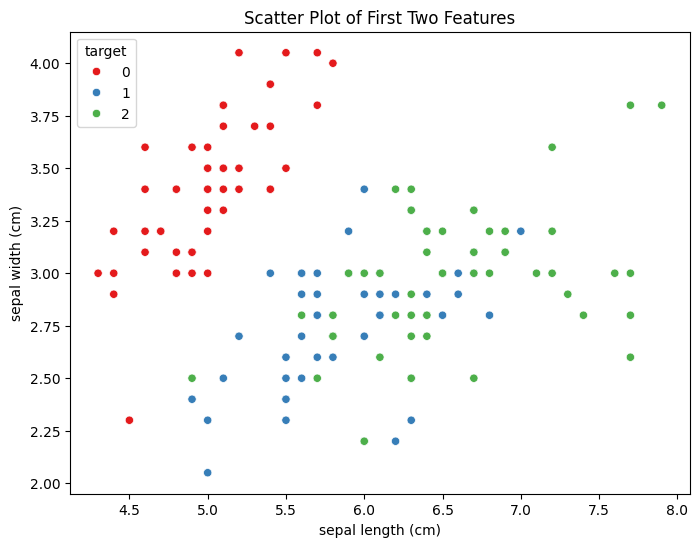

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['target'], palette='Set1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter Plot of First Two Features')
plt.show()

In [36]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [37]:
X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print("\nProcessed Dataset Head:")
print(df.head())


Processed Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.051961          -1.340227         -1.315444   
1          -1.143017         -0.127367          -1.340227         -1.315444   
2          -1.385353          0.344364          -1.397064         -1.315444   
3          -1.506521          0.108498          -1.283389         -1.315444   
4          -1.021849          1.287827          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [39]:
print("\nTrain set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (120, 4)
Test set size: (30, 4)
